Junction Art has the ability to create intersection in two ways.
 - By using <b>JunctionBuilderFromPointsAndHeading</b>
 - By using <b>SequentialJunctionBuilder</b> 

In this notebook we will see how to generate intersection using <b>SequentialJunctionBuilder</b>. This process adds random roads sequentially and creates the intersection. This random roads are incident to the intersection. Before starting to create intersections using <b>SequentialJunctionBuilder</b>, lets set some directory variables. Depending on the directory settings this will be different for different users. In order to visualize the generated intersection we also need a module from esmini.
 - The <b>projectFolder</b> is where we have the <b>JunctionArt</b> project.  
 - The <b>esminipath</b> is where we have the <b>esmini</b> project. 

In [1]:
projectFolder = 'C:/Users/abjaw/Documents/GitHub/junction-art' # add the correct directory name where you downloaded the junction art project
esminipath = 'C:/Users/abjaw/Documents/GitHub/esmini' # add the correct directory name where you downloaded the esmini

Next lets put the folder directory to system path so that we dont get any import errors. 

In [2]:
import os, sys
currentFolder = os.path.abspath('')
try:
    sys.path.remove(str(currentFolder))
except ValueError: # Already removed
    pass
sys.path.append(str(projectFolder))
os.chdir(projectFolder)
print( f"current working dir{os.getcwd()}")

current working dirC:\Users\abjaw\Documents\GitHub\junction-art


Lets import the necessary modules for creating the intersection using <b>SequentialJunctionBuilder</b>. 

In [3]:
import numpy as np
from junctionart.junctions.LaneConfigurationStrategies import LaneConfigurationStrategies
from junctionart.junctions.SequentialJunctionBuilder import SequentialJunctionBuilder
import junctionart.extensions as extensions
import pyodrx

Create the <b>intersectionBuilder</b> object for <b>SequentialJunctionBuilder</b>. <b>SequentialJunctionBuilder</b> takes in various paramters for randomizing the intersection generation process. We describe them below:
 - minAngle = minimum possible angle between incident roads 
 - maxAngle = maximum possible angle between incident roads
 - straightRoadLen = length of the straight incident roads 
 - probLongConnection = probability to create a long connection road (connection roads are roads inside the intersection)
 - probMinAngle = probability of having roads with minimum angle
 - probRestrictedLane = probability to add a median in the incident roads 
 - maxConnectionLength = maximum length of the connection road
 - minConnectionLength = minimum length of the connection road
 - random_seed = seed for the random generator

In [4]:
intersectionBuilder = SequentialJunctionBuilder(minAngle=np.pi/10, 
                                                maxAngle=np.pi * .75, 
                                                straightRoadLen=10, 
                                                probLongConnection=0.1, 
                                                probMinAngle=0.1, 
                                                probRestrictedLane=0.05, 
                                                maxConnectionLength=50, 
                                                minConnectionLength=20, 
                                                random_seed=2)

<b>SequentialJunctionBuilder</b> can generate arbitrary number of roads as long as the roads maintain the length and angle constrains. For some input it might create roads that are impossible in the real world. Junction art come with an intersection validator that can catch most of the impossible ones. <b>SequentialJunctionBuilder</b> has a function <b>createWithRandomLaneConfigurations</b> that can create intersection with random lane configurations. The parameters are listed below:
 - straightRoadsPath = 
 - maxNumberOfRoadsPerJunction = maximum number of roads allowed in the intersection
 - maxLanePerSide= maximum number of lanes 
 - minLanePerSide= minimum number of lanes 
 - internalConnections = if false, connection roads are created only between a road and its immediate next road. if true, connection roads are created between any two roads
 - cp1 =  determines how the first road is connected with the intersection. possible values are start and end point. 
 - internalLinkStrategy = 

To view the created OpenDRIVE file, we use odr_plot from esmini. 


C:/Users/abjaw/Documents/GitHub/esmini\bin\odrplot C:/Users/abjaw/Documents/GitHub/esmini/bin/pythonroad.xodr


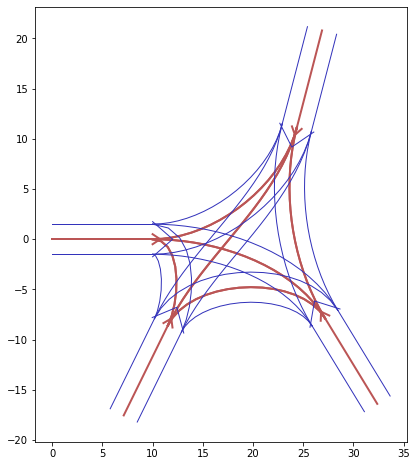

In [5]:
maxNumberOfRoadsPerJunction = 4
odr = intersectionBuilder.createWithRandomLaneConfigurations(straightRoadsPath=' ',  
                            id=0, 
                            maxNumberOfRoadsPerJunction=maxNumberOfRoadsPerJunction, 
                            maxLanePerSide=1, minLanePerSide=1, 
                            internalConnections=True, 
                            cp1=pyodrx.ContactPoint.end,
                            internalLinkStrategy = LaneConfigurationStrategies.SPLIT_FIRST)

extensions.view_road(odr,esminipath)